In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# set the max columns to none
pd.set_option('display.max_columns', None)



In [2]:
# import mlflow 


# mlflow.set_tracking_uri('sqlite:///mlflow.db')
# mlflow.set_experiment('Project-experiment')

In [3]:
employee_df = pd.read_csv('../datasets/HR-Employee-Attrition.csv')
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## About Dataset
Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

### Education           
-   1 'Below College'
-   2 'College'
-   3 'Bachelor'
-   4 'Master'
-   5 'Doctor'

### EnvironmentSatisfaction
-   1 'Low'
-   2 'Medium'
-   3 'High'
-   4 'Very High'

### JobInvolvement
-   1 'Low'
-   2 'Medium'
-   3 'High'
-   4 'Very High'

### JobSatisfaction
-   1 'Low'
-   2 'Medium'
-   3 'High'
-   4 'Very High'

### PerformanceRating
-   1 'Low'
-   2 'Good'
-   3 'Excellent'
-   4 'Outstanding'

### RelationshipSatisfaction
-   1 'Low'
-   2 'Medium'
-   3 'High'
-   4 'Very High'

### WorkLifeBalance
-   1 'Bad'
-   2 'Good'
-   3 'Better'
-   4 'Best'



In [4]:
#Understanding the dataset
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
#Changing categorical data to numerical data
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x=='Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x=='Yes' else 0)

In [7]:
# Checking for missing values
employee_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

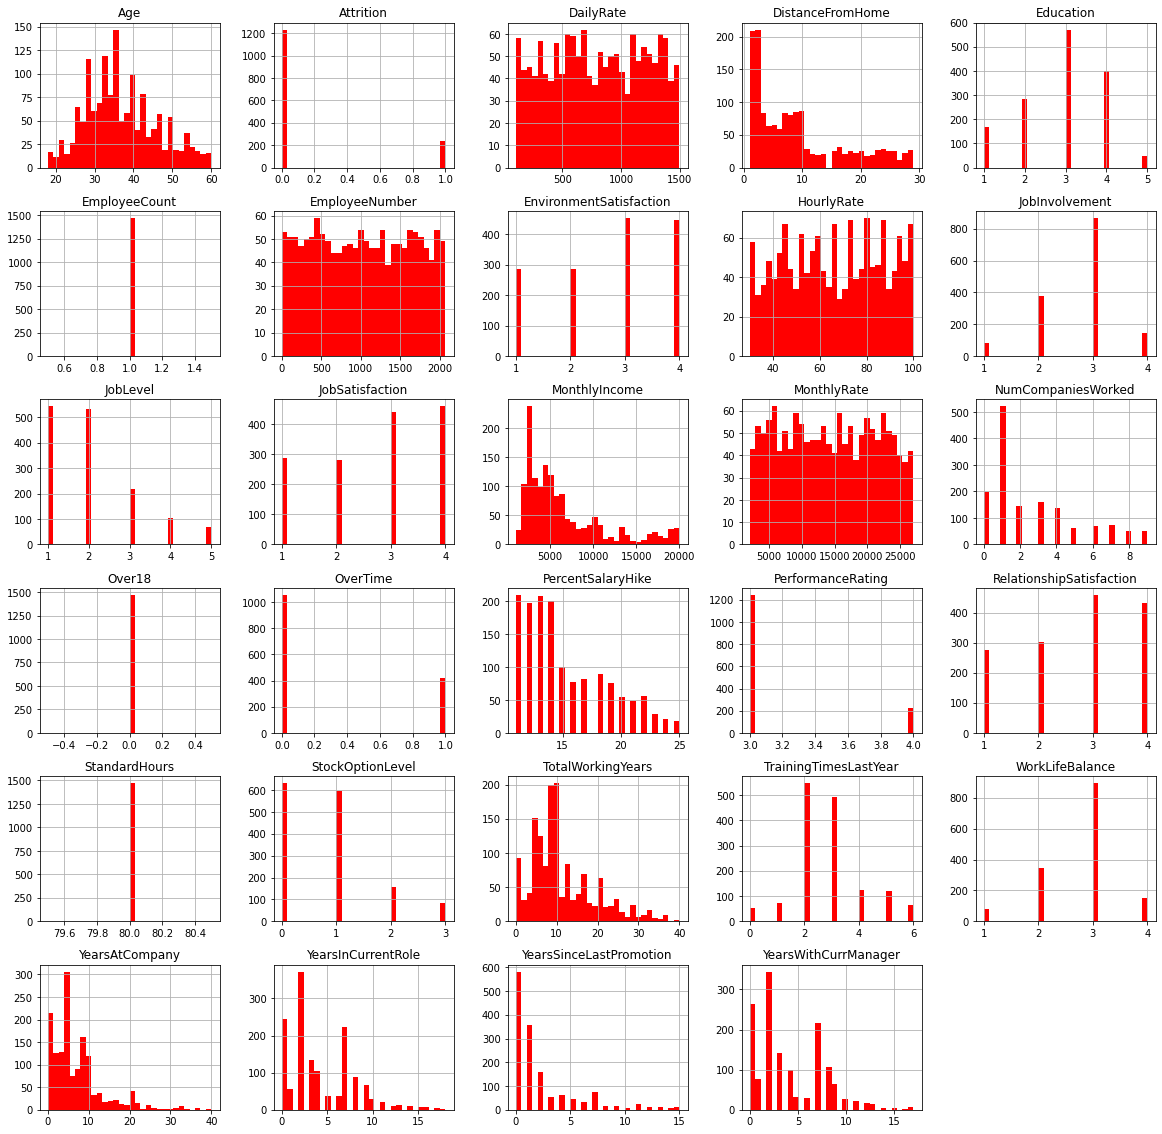

In [8]:
#Histogram of employees_df
employee_df.hist(bins=30, figsize=(20,20), color ='r')

In [9]:
# We've got some columns that are not useful for our analysis: EmployeeCount, StandardHours, EmployeeNumber.
# We can drop them from our dataset.

employee_df.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

In [10]:
#Let's see how many employees left the company
employee_df['Attrition'].value_counts()
#Create two df with the employees who left and those who stayed
employee_df_left = employee_df[employee_df['Attrition'] == 1]
employee_df_stayed = employee_df[employee_df['Attrition'] == 0]

In [11]:
#Percentage of people who left the company
100*employee_df_left.shape[0]/employee_df.shape[0]

16.122448979591837

In [12]:
#Percentage of people who stayed in the company
100*employee_df_stayed.shape[0]/employee_df.shape[0]

83.87755102040816

In [13]:
#People who left and people who stayed in the company
employee_df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [14]:
#Analysis between people who left and those who stayed
employee_df_left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.0,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.0,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.0,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.0,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,0.0,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,0.0,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,0.0,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [15]:
employee_df_stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.0,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.0,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.0,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.0,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.0,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.0,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,0.0,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


## Conclusions:
    1. People who left the company are younger than people who stayed in the company.
    2. DistanceFromHome is greater for people who left the company.
    3. EnviromentSatisfaction is greater for people who stayed in the company.

In [16]:
#Correlations 
corr = employee_df.corr()

<AxesSubplot:>

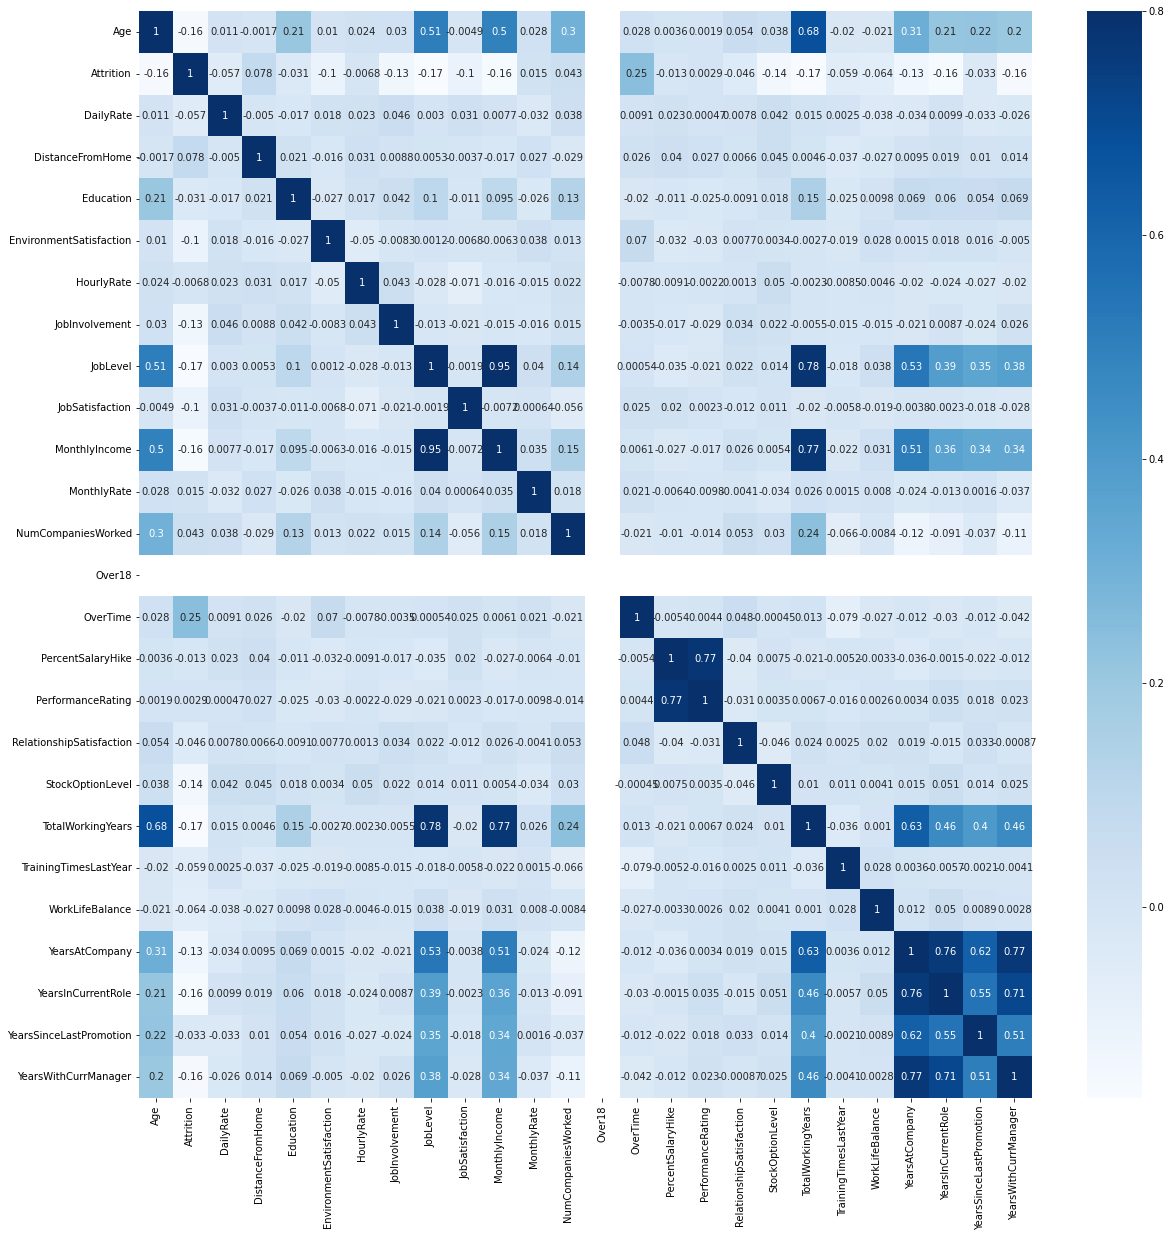

In [17]:
#Plotting the correlation matrix
f, ax = plt.subplots(figsize =(20,20))
sns.heatmap(corr, vmax = .8, annot = True, cmap = 'Blues') 

<AxesSubplot:xlabel='Age', ylabel='count'>

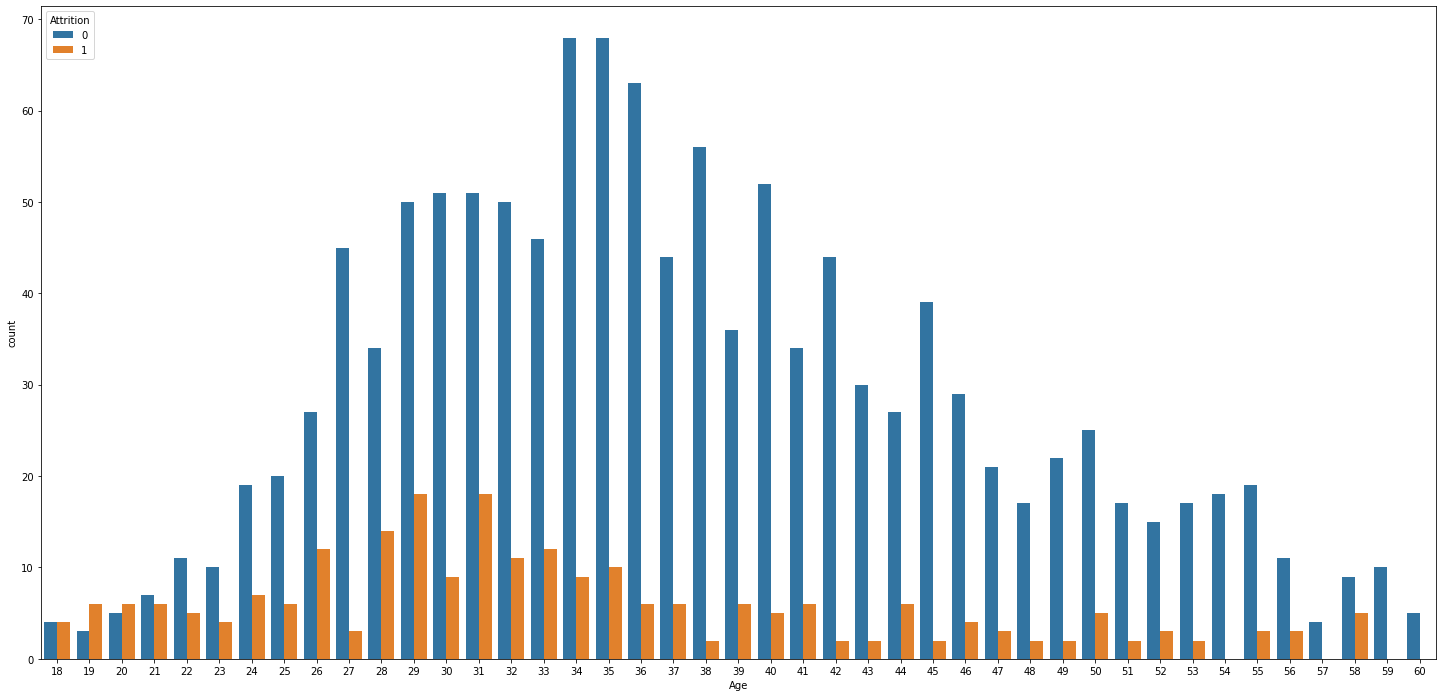

In [18]:
#Analyzing variables that we concluded are important
plt.figure(figsize=(25,12))
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

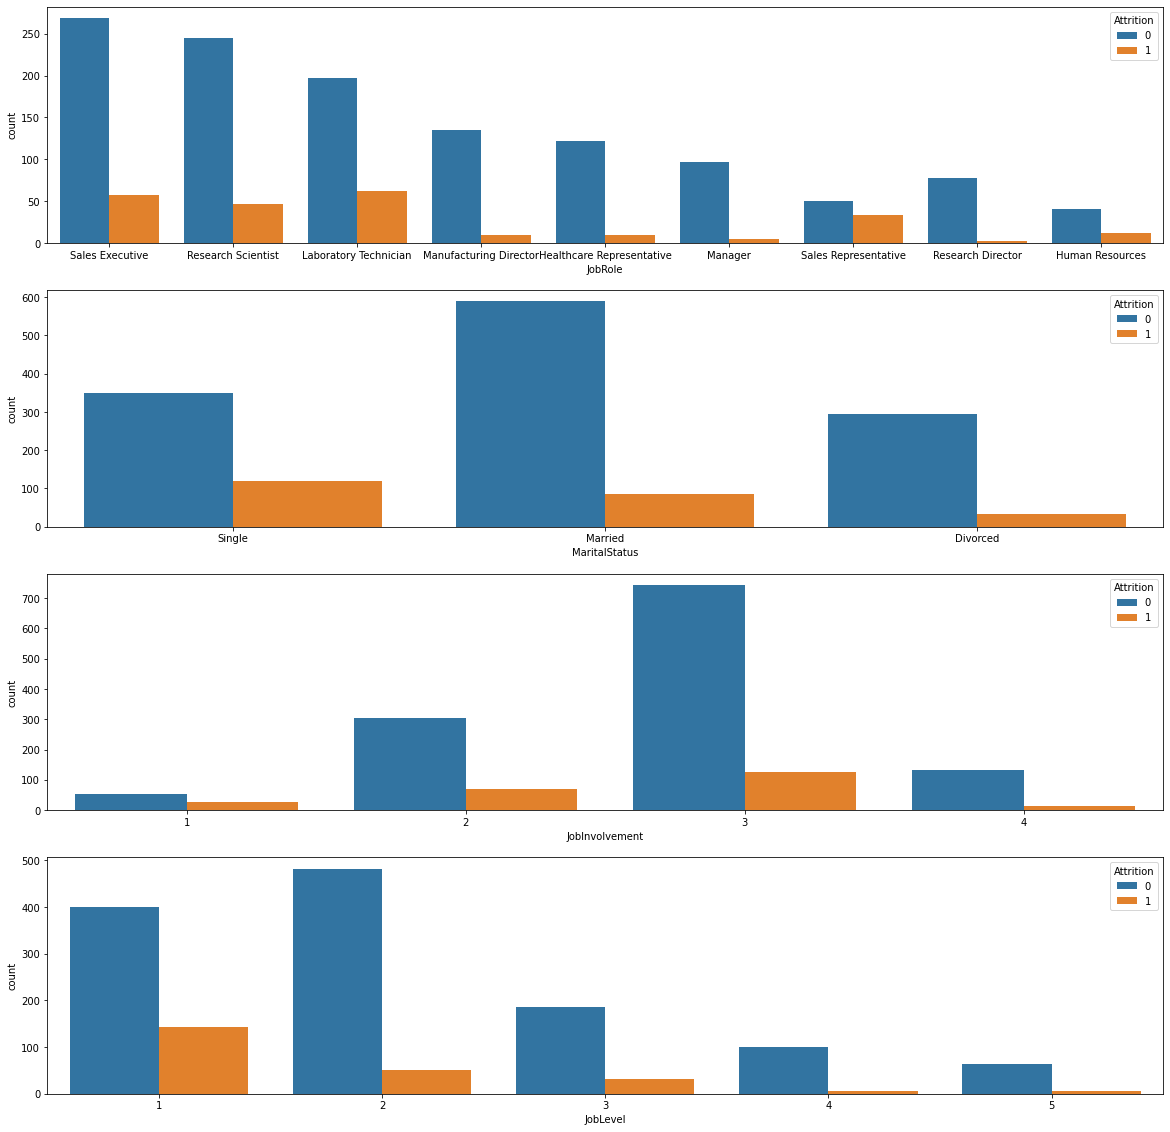

In [19]:
#Analyzing another features
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.countplot(x='JobRole', hue='Attrition', data=employee_df)

plt.subplot(412)

sns.countplot(x='MaritalStatus', hue='Attrition', data=employee_df)

plt.subplot(413)

sns.countplot(x='JobInvolvement', hue='Attrition', data=employee_df)


plt.subplot(414)
sns.countplot(x='JobLevel', hue='Attrition', data=employee_df)

Text(0.5, 0, 'Distance from home')

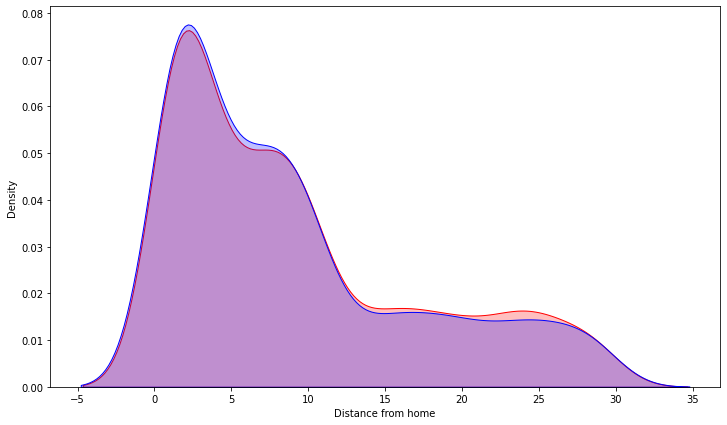

In [20]:
plt.figure(figsize=(12,7))
#Probabilitical distribution of the variables
sns.kdeplot(employee_df['DistanceFromHome'], label = 'Employees who left', color = 'r', shade = True)
sns.kdeplot(employee_df_stayed['DistanceFromHome'], label = 'Employees who stayed', color = 'b', shade = True)


plt.xlabel('Distance from home')

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

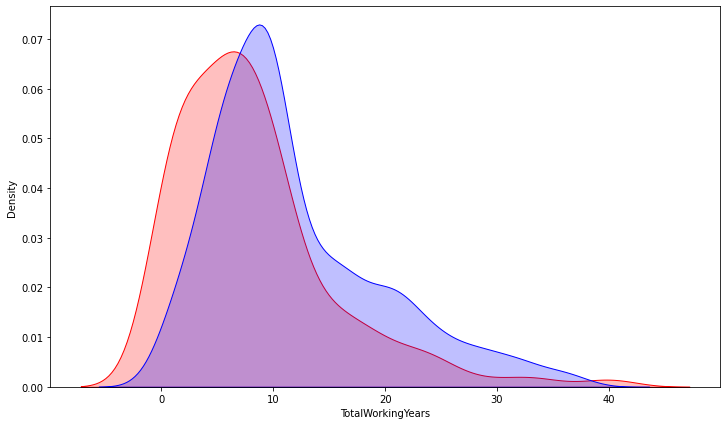

In [21]:

#Total Working Years kde analysis
plt.figure(figsize=(12,7))
sns.kdeplot(employee_df_left['TotalWorkingYears'], label = 'Employees who left', color = 'r', shade = True)
sns.kdeplot(employee_df_stayed['TotalWorkingYears'], label = 'Employees who stayed', color = 'b', shade = True)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

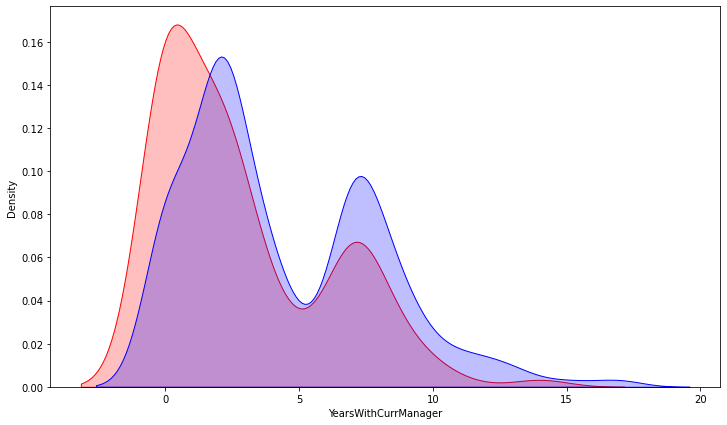

In [22]:
#Years with Current Manager at company kde analysis
plt.figure(figsize=(12,7))
sns.kdeplot(employee_df_left['YearsWithCurrManager'], label = 'Employees who left', color = 'r', shade = True)
sns.kdeplot(employee_df_stayed['YearsWithCurrManager'], label = 'Employees who stayed', color = 'b', shade = True)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

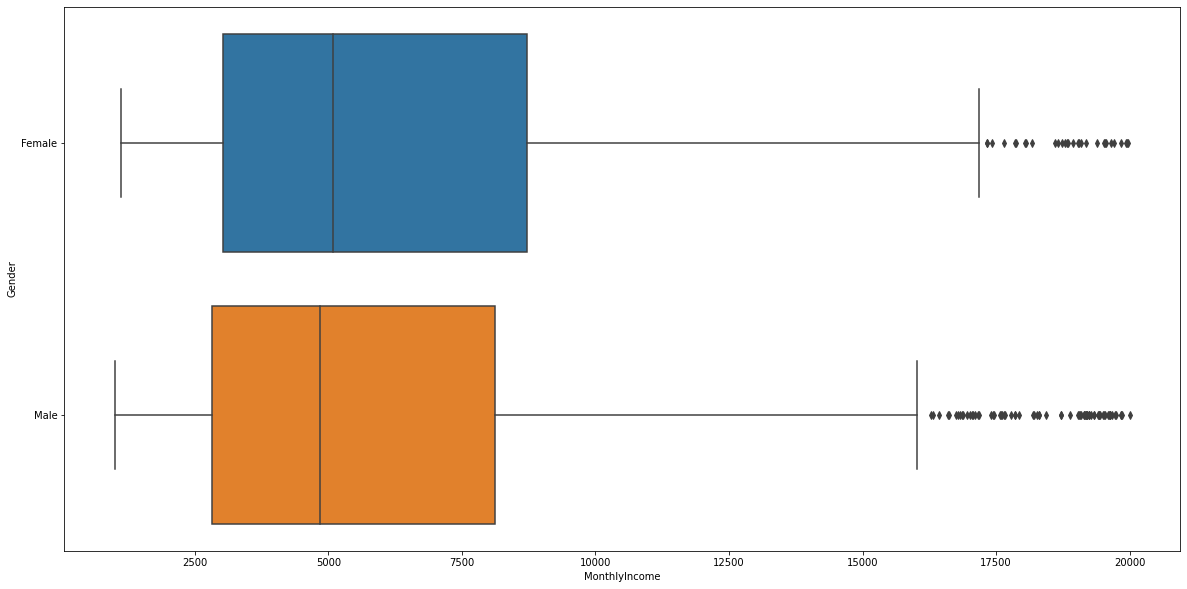

In [23]:
#Gender vs Monthly Income
plt.figure(figsize=(20,10))
sns.boxplot(x = 'MonthlyIncome', y='Gender', data = employee_df)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

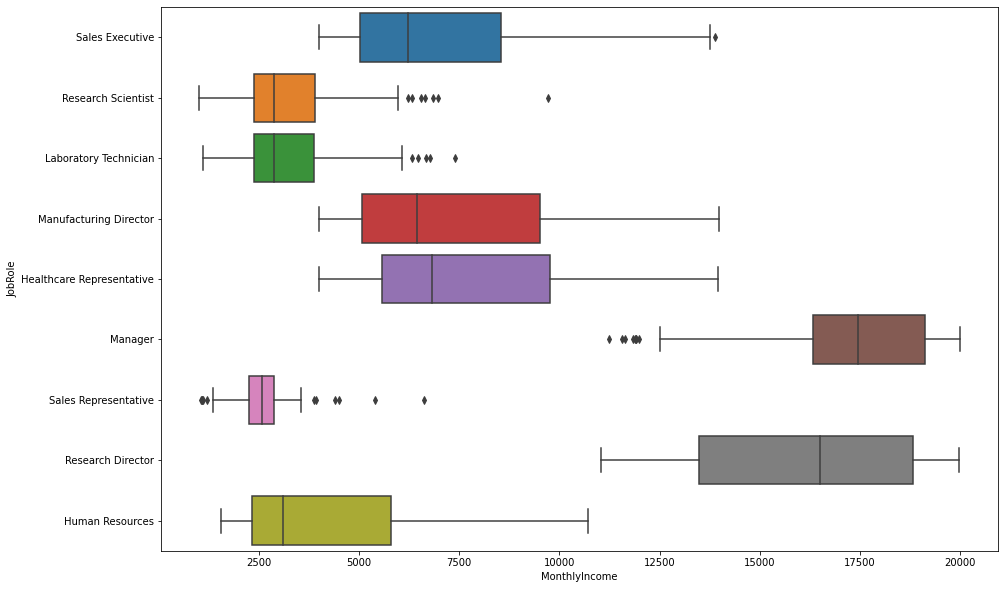

In [24]:
#Monthly Income vs Job Role
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data = employee_df)

In [25]:
#Categorical variables
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [26]:
#Those are categorical variables and we need to trasform them to numerical variables.
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [27]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
X_cat = onehot.fit_transform(X_cat).toarray()

In [28]:
X_cat.shape

(1470, 26)

In [29]:
#Convert X_cat to df
X_cat  = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [30]:
#Extract X_num from employee_df
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [31]:
#Concat X_num and X_cat
X_all = pd.concat([X_cat, X_numerical], axis = 1)

In [32]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [33]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_all = scaler.fit_transform(X_all)

c:\Users\User\anaconda3\envs\project_enviroment\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\User\anaconda3\envs\project_enviroment\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [34]:
X_all

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [35]:
#Our target variable is Attrition
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [36]:
#Logistical Regression Model for predicting the attrition

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all,y, test_size = 0.25, random_state = 0)

In [37]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score


# with mlflow.start_run():
#     #Create a tag 
#     mlflow.set_tag('model_type', 'logistic_regression')
#     mlflow.set_tag('developer', 'Esteban')
#     mlflow.log_param('train-data-path', 'data/employee_data.csv')
#     mlflow.log_param('test-data-path', 'data/employee_data.csv')
#     #Create Model
#     logreg = LogisticRegression()
#     logreg.fit(X_train,y_train)
#     y_pred = logreg.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     mlflow.log_metric('accuracy', accuracy)

#     #mlflow.log_artifact(local_path = '../models/logreg.pkl', artifact_path='models/logreg.pkl')

#     mlflow.sklearn.log_model(logreg, 'models/logreg')

In [38]:
# with open('../models/logreg.pkl', 'wb') as f:
#     pickle.dump(logreg, f)

In [39]:
#Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy {}%'.format(100*accuracy_score(y_test, y_pred)))

NameError: name 'accuracy_score' is not defined

<AxesSubplot:>

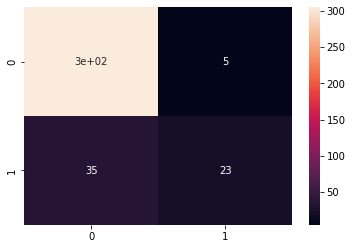

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [ ]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       310
           1       0.82      0.40      0.53        58

    accuracy                           0.89       368
   macro avg       0.86      0.69      0.74       368
weighted avg       0.89      0.89      0.87       368



In [ ]:
## Trying another approach to get the model

from typing import Dict
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#import dectvectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import MaxAbsScaler
df = pd.read_csv('../datasets/HR-Employee-Attrition.csv')

#Drop the columns we don't need
df.drop(['EmployeeCount', 'EmployeeNumber','StandardHours'], axis = 1, inplace = True)
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df['Over18'] = df['Over18'].map({'Yes':1, 'No':0})
df['OverTime'] = df['OverTime'].map({'Yes':1, 'No':0})
#Categorical data 
categorical = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
#Numerical data
numerical = ['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']

## Divide the data into train and test
df_train_all, df_test =train_test_split(df, test_size = 0.25, random_state = 0)
##Obtain y values
y_train_all = df_train_all['Attrition'].astype(int).values
y_test = df_test['Attrition'].astype(int).values

## Training model 
df_train, df_val = train_test_split(df_train_all, test_size = 0.25, random_state = 0)
y_train = df_train['Attrition'].astype(int).values
y_val = df_val['Attrition'].astype(int).values
## Use DictVectorizer()
train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)


In [ ]:
## Use LogisticRegression() to train the model
logreg = LogisticRegression()
## Applying MaxAbsScaler() to the data
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
## Transform validation set to dicts
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dicts)
X_val = scaler.transform(X_val)

##Ap

## Predict on validation set
y_pred = logreg.predict_proba(X_val)[:,1]

In [ ]:
## Roc Auc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.7949152542372881

In [ ]:
## Let's make the pipeline
from sklearn.pipeline import make_pipeline

Pipeline = make_pipeline(
    DictVectorizer(),
    MaxAbsScaler(),
    LogisticRegression(),

)

## Fit the pipeline
Pipeline.fit(train_dicts, y_train)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('maxabsscaler', MaxAbsScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
#Test pipeline
y_pred = Pipeline.predict_proba(val_dicts)[:,1]

## Evaluate the model
roc_auc_score(y_val, y_pred)

0.7949152542372881

In [ ]:
import pickle
with open ('../models/pipeline.bin', 'wb' ) as f_out: 
    pickle.dump(Pipeline, f_out)

In [ ]:
df_val

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
869,46,0,Travel_Rarely,1450,Research & Development,15,2,Life Sciences,4,Male,52,3,5,Research Director,2,Married,19081,10849,5,NaN,0,11,3,1,1,25,2,3,4,2,0,3
334,45,0,Travel_Rarely,549,Research & Development,8,4,Other,4,Male,75,3,2,Research Scientist,4,Married,3697,9278,9,NaN,0,14,3,1,2,12,3,3,10,9,9,8
622,32,0,Travel_Rarely,117,Sales,13,4,Life Sciences,2,Male,73,3,2,Sales Executive,4,Divorced,4403,9250,2,NaN,0,11,3,3,1,8,3,2,5,2,0,3
1461,50,1,Travel_Rarely,410,Sales,28,3,Marketing,4,Male,39,2,3,Sales Executive,1,Divorced,10854,16586,4,NaN,1,13,3,2,1,20,3,3,3,2,2,0
598,28,1,Travel_Rarely,890,Research & Development,2,4,Medical,3,Male,46,3,1,Research Scientist,3,Single,4382,16374,6,NaN,0,17,3,4,0,5,3,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,37,0,Travel_Frequently,319,Sales,4,4,Marketing,1,Male,41,3,1,Sales Representative,4,Divorced,2793,2539,4,NaN,0,17,3,3,1,13,2,3,9,8,5,8
258,51,0,Travel_Rarely,833,Research & Development,1,3,Life Sciences,3,Male,96,3,1,Research Scientist,4,Married,2723,23231,1,NaN,0,11,3,2,0,1,0,2,1,0,0,0
369,31,0,Travel_Rarely,408,Research & Development,9,4,Life Sciences,3,Male,42,2,1,Research Scientist,2,Single,2657,7551,0,NaN,1,16,3,4,0,3,5,3,2,2,2,2
789,44,1,Travel_Rarely,1376,Human Resources,1,2,Medical,2,Male,91,2,3,Human Resources,1,Married,10482,2326,9,NaN,0,14,3,4,1,24,1,3,20,6,3,6


In [ ]:
len(categorical), len(numerical)

(6, 24)

In [ ]:
df_train.shape

(826, 32)

In [ ]:
f = categorical + numerical
[i for i in df_train.columns if i not in f]

['Attrition', 'Over18']

In [ ]:
df_train['Over18']

544    NaN
559    NaN
1337   NaN
1238   NaN
246    NaN
        ..
91     NaN
1194   NaN
710    NaN
507    NaN
1161   NaN
Name: Over18, Length: 826, dtype: float64

In [ ]:
list(y_pred)

[0.008522007669111225,
 0.058016500370686126,
 0.07427738821184672,
 0.47572611032893886,
 0.11334076549599542,
 0.516688160300779,
 0.007893075705302907,
 0.0829398555491056,
 0.0897166808168115,
 0.022631568054153204,
 0.399831797916576,
 0.763504744397351,
 0.12474601199884382,
 0.09800865582293637,
 0.0967165457082493,
 0.08544944067061977,
 0.028763419994676902,
 0.7017636140289754,
 0.08337916154904115,
 0.04174507487404333,
 0.04689999826680416,
 0.414102051586037,
 0.4034729837991494,
 0.48508420423140286,
 0.00916164255767206,
 0.25380091122367476,
 0.07778034788625804,
 0.025502096426504164,
 0.002477864713137516,
 0.1262573533583682,
 0.22274067963793837,
 0.4149254195258591,
 0.03428857902551132,
 0.12132044371753638,
 0.29827559161109485,
 0.3796361117243288,
 0.04925833091370769,
 0.007402284149152141,
 0.10164509966225908,
 0.08521037611061498,
 0.030773133067530215,
 0.292967001647955,
 0.032141386627704056,
 0.09469038009180689,
 0.013001977812487832,
 0.07579381523645

In [ ]:
employee_df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
employee_df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
employee_df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
employee_df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
employee_df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [ ]:
employee_df.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)